In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import joblib
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
import xgboost as xgb

In [4]:
data=pd.read_csv('../App/Data/kc_house_data.csv')

In [5]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
data['date'] = pd.to_datetime(data['date'], format ='%Y-%m-%d')
data['yr_built'] = pd.to_datetime(data['yr_built'], format = '%Y').dt.year
data.loc[data['yr_renovated']!= 0, 'yr_renovated' ] = pd.to_datetime(data.loc[data['yr_renovated']!= 0, 'yr_renovated' ], format = '%Y').dt.year

In [7]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [8]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
data.shape[0]

21613

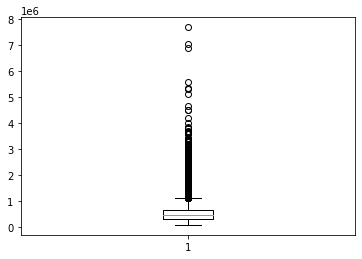

In [10]:
Cvp=plt.boxplot(data['price'])

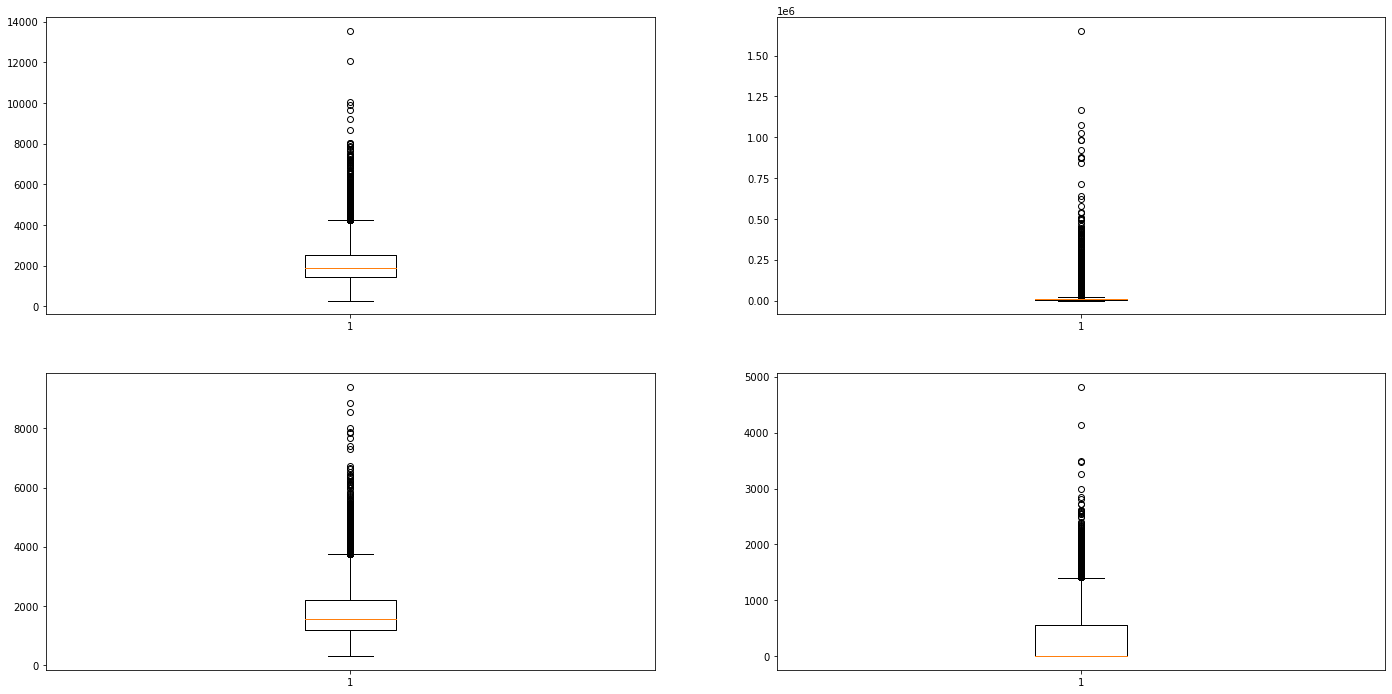

In [11]:
fig = plt.figure(figsize = (24,12))
gs = gridspec.GridSpec(2, 2, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax1 = plt.boxplot(data['sqft_living'])
ax2 = fig.add_subplot(gs[0,1])
ax2 = plt.boxplot(data['sqft_lot'])
ax3 = fig.add_subplot(gs[1,0])
ax3 = plt.boxplot(data['sqft_above'])
ax4 = fig.add_subplot(gs[1,1])
ax4 = plt.boxplot(data['sqft_basement'])

# limitacion de la base de datos

#### Se limito con la ayuda de los cuartiles:

RI=Q3-Q1

Error permitido:

Q1-1.5 x RI

Q3-1.5 x RI

Se consideraron las siguientes columnas como las de mayor influencia en la base de datos por su nivel de variacion, por lo que se decidio limitarlas

In [12]:
v1=np.percentile(data['price'], 75)+1.5*(np.percentile(data['price'], 75)-np.percentile(data['price'], 25))
v2=np.percentile(data['sqft_living'], 75)+1.5*(np.percentile(data['sqft_living'], 75)-np.percentile(data['sqft_living'], 25))
v3=np.percentile(data['sqft_lot'], 75)+1.5*(np.percentile(data['sqft_lot'], 75)-np.percentile(data['sqft_lot'], 25))
v4=np.percentile(data['sqft_above'], 75)+1.5*(np.percentile(data['sqft_above'], 75)-np.percentile(data['sqft_above'], 25))
v5=np.percentile(data['sqft_basement'], 75)+1.5*(np.percentile(data['sqft_basement'], 75)-np.percentile(data['sqft_basement'], 25))

In [13]:
## (data['price']<v1)&

Se limito la base de datos sin tocar la variable precio

In [14]:
data = data[(data['bedrooms']<15)&
            (data['bathrooms']<7)&
            (data['sqft_living']<v2)&
            (data['sqft_lot']<v3)&
            (data['sqft_above']<v4)&
            (data['sqft_basement']<v5)
             ]

In [15]:
data.shape[0]

18434

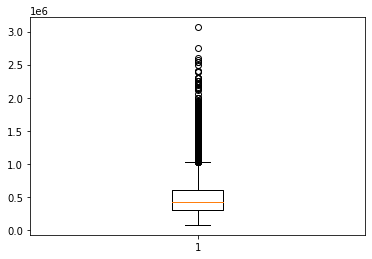

In [16]:
Cvp1=plt.boxplot(data['price'])

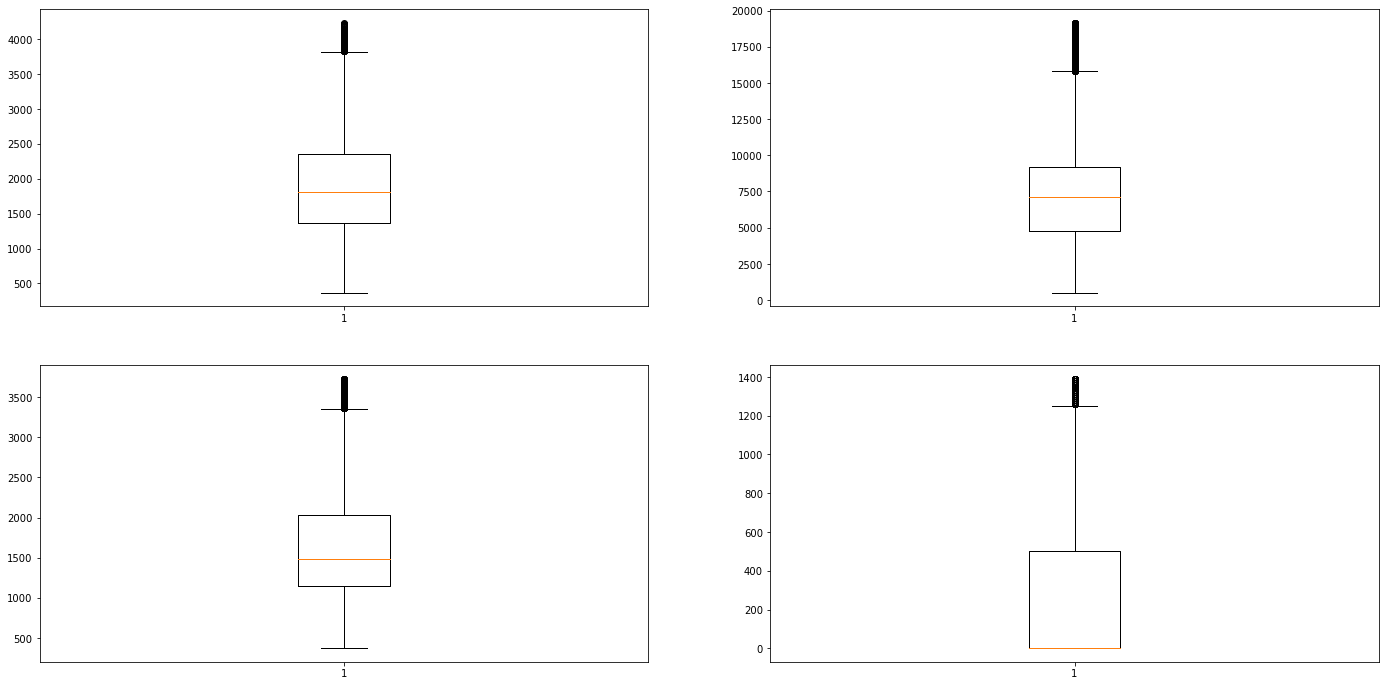

In [17]:
fig1 = plt.figure(figsize = (24,12))
gs1 = gridspec.GridSpec(2, 2, figure = fig1)

ax4 = fig1.add_subplot(gs1[0,0])
ax4 = plt.boxplot(data['sqft_living'])
ax5 = fig1.add_subplot(gs1[0,1])
ax5 = plt.boxplot(data['sqft_lot'])
ax6 = fig1.add_subplot(gs1[1,0])
ax6 = plt.boxplot(data['sqft_above'])
ax7 = fig1.add_subplot(gs1[1,1])
ax7 = plt.boxplot(data['sqft_basement'])

#### La base de datos paso de tener Originalmente 21613 elementos a 18434

C:\Users\WILLIAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\WILLIAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


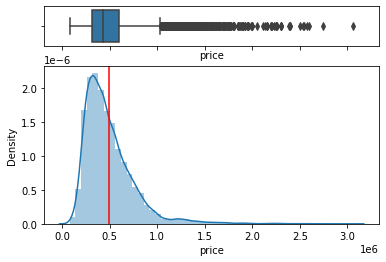

In [21]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})

sns.boxplot(data['price'], ax=ax[0])
sns.distplot(data['price'], ax=ax[1])
ax[1].axvline(np.mean(data['price']), color='red')

In [22]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
NC = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','sqft_living15','sqft_lot15']
data_aux = data[NC]

In [24]:
# Matriz de información
X = data_aux.drop(columns = ['price'])
# Variable respuesta
y = data_aux['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
2039,3,2.5,1530,2890,2.0,0,0,3,7,1530,0,2001,1540,2890
10046,2,1.0,720,4840,1.0,0,0,4,6,720,0,1947,1510,4840
19853,3,1.5,1240,983,3.0,0,0,3,8,1240,0,2009,1240,1026
14122,2,1.0,980,3400,1.0,0,0,3,7,980,0,1923,1200,3420
8447,3,3.0,2300,7701,1.0,0,0,3,7,2300,0,1960,1570,8116


# Transformacion de X train

In [27]:
print(X_train.columns.to_list())

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']


In [28]:
for item in X_train.columns.to_list():
    if item != 'sqft_living':
        scaler = MinMaxScaler()
    if item == 'sqft_living':
        scaler = RobustScaler()
    X_train[[item]] = scaler.fit_transform(X_train[[item]])
    joblib.dump(scaler, '../Parameters/'+item+'.pkl')

C:\Users\WILLIAM\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\WILLIAM\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\WILLIAM\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

# Transformacion de y train

In [29]:
y_train.head()

2039     320000.0
10046    235000.0
19853    318000.0
14122    380000.0
8447     250000.0
Name: price, dtype: float64

In [30]:
y_train = np.log1p( y_train )

In [31]:
y_train.head()

2039     12.676079
10046    12.367345
19853    12.669810
14122    12.847929
8447     12.429220
Name: price, dtype: float64

# Transformacion de x test

In [32]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
7829,3,1.00,1200,7200,1.0,0,0,3,6,1200,0,1977,1200,7420
16476,4,1.75,2380,5700,2.0,0,1,4,7,1820,560,1946,2190,5700
6950,3,1.75,2300,16474,1.0,0,0,3,7,1220,1080,1984,1940,15601
15642,3,2.25,1710,4140,2.0,0,0,3,8,1710,0,2004,1730,3680
7505,3,1.75,1490,10125,1.0,0,0,4,7,1490,0,1962,2488,4981


In [33]:
for item in X_test.columns.to_list(): 
    scaler = joblib.load('../Parameters/'+item+'.pkl')
    X_test[[item]] = scaler.transform(X_test[[item]])

C:\Users\WILLIAM\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\WILLIAM\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\WILLIAM\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [34]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
7829,0.272727,0.173913,-0.612245,0.358735,0.0,0.0,0.00,0.50,0.333333,0.247024,0.000000,0.669565,0.164811,0.034546
16476,0.363636,0.304348,0.591837,0.278181,0.4,0.0,0.25,0.75,0.444444,0.431548,0.402878,0.400000,0.385301,0.025768
6950,0.272727,0.304348,0.510204,0.856775,0.0,0.0,0.00,0.50,0.444444,0.252976,0.776978,0.730435,0.329621,0.076299
15642,0.272727,0.391304,-0.091837,0.194404,0.4,0.0,0.00,0.50,0.555556,0.398810,0.000000,0.904348,0.282851,0.015459
7505,0.272727,0.304348,-0.316327,0.515815,0.0,0.0,0.00,0.75,0.444444,0.333333,0.000000,0.539130,0.451670,0.022099


# Machine Learning

Definir funciones clave

In [35]:
def metricas_validacion_cruzada(modelo, modelo_nombre,k, X, y ):
    MAE = cross_val_score(modelo, X, y, cv=k, scoring = 'neg_mean_absolute_error')
    r2 = cross_val_score(modelo, X, y, cv=k, scoring = 'r2')
    MSE = cross_val_score(modelo, X, y, cv=k, scoring = 'neg_mean_squared_error')
    RMSE = cross_val_score(modelo, X, y, cv=k, scoring = 'neg_root_mean_squared_error')


    return pd.DataFrame({'Modelo': modelo_nombre,
                    'MAE' : str(round(np.mean(-MAE),5))+'+/-'+str(round(np.std(-MAE),2)),
                  'MSE' : str(round(np.mean(-MSE),5))+'+/-'+str(round(np.std(-MSE),2)),
                  'RMSE' : str(round(np.mean(-RMSE),5))+'+/-'+str(round(np.std(-RMSE),2)),
                'R2' : str(round(np.mean(r2),5))+'+/-'+str(round(np.std(-r2),2))
    }, index = [0])

In [36]:
def metricas(modelo, yobs, yhat):
    # MAE 
    MAE = np.mean(np.abs(yobs-yhat))
    # MAPE
    MAPE = 100*np.mean(np.abs((yobs-yhat)/yobs))
    # RMSE
    RMSE = np.sqrt(np.mean((yobs-yhat)**2))
    # MSE
    MSE = np.mean((yobs-yhat)**2)
    # R2
    R2 = r2_score(yobs, yhat) 
    
    return pd.DataFrame({'Modelo' : modelo,
                         'MAE' : MAE,
                         'MAPE' : MAPE, 
                         'RMSE' : RMSE,
                         'MSE' : MSE, 
                         'R2': R2
    }, index =[0])

## Regresión Lineal

In [32]:
ajuste = LinearRegression().fit(X_train,y_train)

In [33]:
y_ajustado = ajuste.predict(X_test)

<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

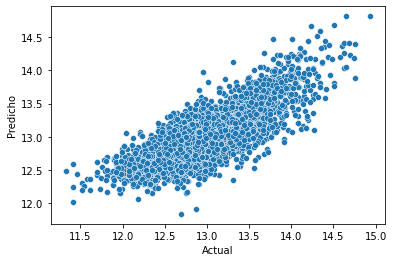

In [34]:
df = pd.DataFrame({'Actual': np.log1p( y_test ), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [35]:
metricas('regresión', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,regresión,0.239714,1.851277,0.300731,0.090439,0.610868


In [36]:
metricas('regresión',y_test,np.expm1(y_ajustado))

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,regresión,114971.810751,24.697008,165517.186794,2.739594e+10,0.634314


### Validación cruzada

In [37]:
y = np.log1p(y)

In [38]:
metricas_validacion_cruzada(LinearRegression(), 'Regresión Lineal', 10, X,y)

,Modelo,MAE,MSE,RMSE,R2
0,Regresión Lineal,0.24085+/-0.01,0.09155+/-0.01,0.30241+/-0.01,0.59333+/-0.02


In [39]:
metricas_validacion_cruzada(LinearRegression(), 'Regresión Lineal', 10, X,y)

,Modelo,MAE,MSE,RMSE,R2
0,Regresión Lineal,0.24085+/-0.01,0.09155+/-0.01,0.30241+/-0.01,0.59333+/-0.02


## Regresión Ridge

In [40]:
params = {'alpha' : [1e-15,1e-10,1e-5,1e-3,0.1, 0.3, 0.5, 0.8,1,5,10,20,30]}
ridge = Ridge()
ridge_regression = GridSearchCV(ridge, params,scoring ='neg_mean_squared_error' , cv = 5)
ridge_regression.fit(X,y)

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06615e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06264e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.1, 0.3, 0.5,
                                   0.8, 1, 5, 10, 20, 30]},
             scoring='neg_mean_squared_error')

In [41]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 1e-10}
-0.09163963948126966


In [42]:
modelo_ridge = Ridge(alpha=0.1).fit(X_train, y_train)

In [43]:
y_ajustado = modelo_ridge.predict(X_test)

<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

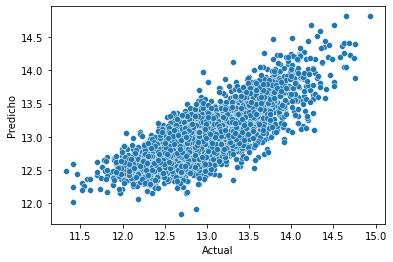

In [44]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [45]:
metricas('regresión', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,regresión,0.239728,1.851387,0.300733,0.09044,0.610865


## Regresión Lasso

In [46]:
params = {'alpha' : [1e-15,1e-10,1e-5,1e-3,0.1, 0.3, 0.5, 0.8,1,5,10,20,30]}
lasso = Lasso()
lasso_regression = GridSearchCV(lasso, params,scoring ='neg_mean_squared_error' , cv = 5)
lasso_regression.fit(X,y)

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 610.107749133285, tolerance: 0.3338131003807458
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 624.1111333109119, tolerance: 0.3351931061687053
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 628.9892238316831, tolerance: 0.3360771436002896
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.1, 0.3, 0.5,
                                   0.8, 1, 5, 10, 20, 30]},
             scoring='neg_mean_squared_error')

In [47]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1e-15}
-0.0916396394812701


In [48]:
modelo_lasso = Lasso(alpha = 1e-05).fit(X_train, y_train)
y_ajustado = modelo_lasso.predict(X_test)

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374.5021252372087, tolerance: 0.31261275842285974
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

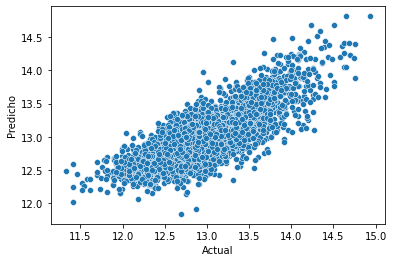

In [49]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [50]:
metricas('regresión Lasso', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,regresión Lasso,0.239734,1.851437,0.300738,0.090443,0.610852


## Regresión Elástica (Regularizada = L1 (Lasso) + L2 (Ridge)) 

In [51]:
params = {
    'alpha':[1e-15,1e-10,1e-5,1e-3,0.1, 0.3, 0.5, 0.8,1,5,10,20,30],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
elastic = ElasticNet()
elastic_net = GridSearchCV(elastic, params,scoring ='neg_mean_squared_error' , cv = 5)
elastic_net.fit(X,y)

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664.5222333941921, tolerance: 0.3338131003807458
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 662.312999545029, tolerance: 0.3351931061687053
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671.858034132842, tolerance: 0.3360771436002896
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658.3960682348944, tolerance: 0.3295265457181522
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 665.3822784005536, tolerance: 0.3441315039483144
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645.1414838661631, tolerance: 0.3338131003807458
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 662.3129997472879, tolerance: 0.3351931061687053
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671.8580343348773, tolerance: 0.3360771436002896
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664.0871275429739, tolerance: 0.3295265457181522
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371.22865924648056, tolerance: 0.3441315039483144
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362.9925323111191, tolerance: 0.3338131003807458
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357.5943172205358, tolerance: 0.3351931061687053
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671.8781899451666, tolerance: 0.3360771436002896
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664.1049800925333, tolerance: 0.3295265457181522
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 683.8586311219034, tolerance: 0.3441315039483144
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363.0380165419463, tolerance: 0.3338131003807458
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357.6137518988202, tolerance: 0.3351931061687053
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364.9360512782284, tolerance: 0.3360771436002896
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 665.5356285203932, tolerance: 0.3295265457181522
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 685.4562822321363, tolerance: 0.3441315039483144
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364.9490063061477, tolerance: 0.3338131003807458
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363.072038481717, tolerance: 0.3351931061687053
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370.38442253108815, tolerance: 0.3360771436002896
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 372.6722877612629, tolerance: 0.3295265457181522
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722.7455780531498, tolerance: 0.3441315039483144
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418.48112830439493, tolerance: 0.3338131003807458
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413.53310687946725, tolerance: 0.3351931061687053
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conv

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798.7024193445448, tolerance: 0.3338131003807458
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797.4452004554331, tolerance: 0.3351931061687053
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.0785268416184, tolerance: 0.3360771436002896
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870.4474704521758, tolerance: 0.3295265457181522
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.4924524019395, tolerance: 0.3441315039483144
  model = cd_fast.enet_coordinate_descent(
C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837.3779784442119, tolerance: 0.41977097103477795
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.1, 0.3, 0.5,
                                   0.8, 1, 5, 10, 20, 30],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='neg_mean_squared_error')

In [52]:
print(elastic_net.best_params_)

{'alpha': 1e-15, 'l1_ratio': 0}


In [53]:
modelo_elastico = ElasticNet(alpha = 1e-05, l1_ratio = 1).fit(X_train,y_train)
y_ajustado = modelo_elastico.predict(X_test)

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374.5021252372087, tolerance: 0.31261275842285974
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

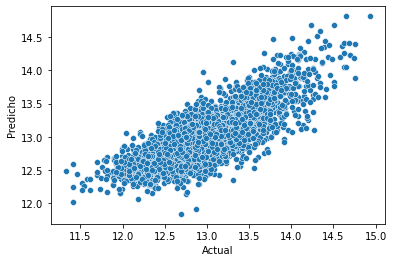

In [54]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [55]:
metricas('regresión elástica', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,regresión elástica,0.239734,1.851437,0.300738,0.090443,0.610852


## K vecinos más cercanos (Regresión)

In [56]:
params ={'n_neighbors':[3,5,7,10],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
kvecinos = KNeighborsRegressor()
modelo_kvecinos = GridSearchCV(kvecinos, params,scoring ='neg_mean_squared_error' , cv = 5)
modelo_kvecinos.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [57]:
modelo_kvecinos.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [58]:
modelo_vecinos = KNeighborsRegressor(algorithm= 'auto', n_neighbors= 10, weights= 'uniform').fit(X_train,y_train)
y_ajustado = modelo_vecinos.predict(X_test)

<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

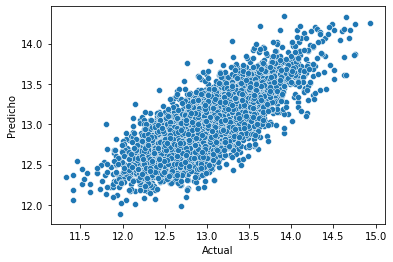

In [59]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [60]:
metricas('Vecinos más cercanos', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,Vecinos más cercanos,0.241213,1.860116,0.304509,0.092726,0.601031


## Árboles de Regresión

In [61]:
params = {'max_depth':[10,12,15,18,20,30,40],
         'min_samples_leaf':[10,15,20,30,50,70,100,120]}
arbol = DecisionTreeRegressor()
modelo_arbol = GridSearchCV(arbol, params,scoring ='neg_mean_squared_error' , cv = 5)
modelo_arbol.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 12, 15, 18, 20, 30, 40],
                         'min_samples_leaf': [10, 15, 20, 30, 50, 70, 100,
                                              120]},
             scoring='neg_mean_squared_error')

In [62]:
modelo_arbol.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

In [63]:
arbol_regresion = DecisionTreeRegressor(max_depth =  12, min_samples_leaf =  50, random_state = 0).fit(X_train, y_train)
y_ajustado = arbol_regresion.predict(X_test)

<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

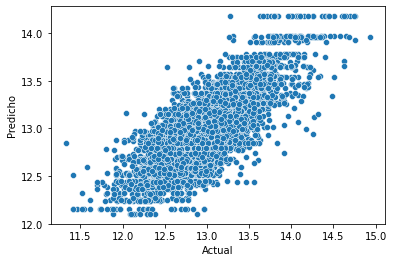

In [64]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [65]:
metricas('Árbol Regresión', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,Árbol Regresión,0.233922,1.804413,0.296895,0.088147,0.620734


## Bosque Aleatorio (Regresión)

In [66]:
params = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}
bosque = RandomForestRegressor()
modelo_bosque = GridSearchCV(bosque, params,scoring ='neg_mean_squared_error' , cv = 5)
modelo_bosque.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]},
             scoring='neg_mean_squared_error')

In [67]:
bosque_regresion = RandomForestRegressor().fit(X_train, y_train)
y_ajustado = bosque_regresion.predict(X_test)

<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

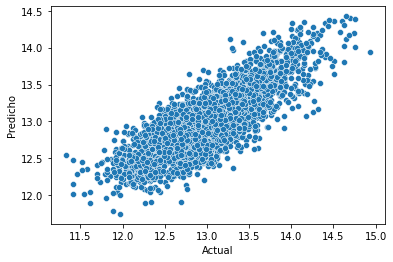

In [68]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [69]:
metricas('Bosque Regresión', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,Bosque Regresión,0.21392,1.651192,0.275467,0.075882,0.673504


## Máquina de Soporte Vectorial (Regresión)

In [ ]:
params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}
svm = SVR()
modelo_svm = GridSearchCV(svm, params,scoring ='neg_mean_squared_error' , cv = 5)
modelo_svm.fit(X,y)

In [ ]:
SVM_regresion = SVR().fit(X_train, y_train)
y_ajustado = SVM_regresion.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [ ]:
metricas('Máquina Soporte Vectorial', np.log1p( y_test ),y_ajustado)

## XGboosting (Extreme Gradient boosting)

In [ ]:
params ={ 
    'n_estimators': [50,70,90,100,110,120],
    'max_depth': [1,3,5,7,9,10],
    'eta': [0.3, 0.1, 0.01]}
xgboost = xgb.XGBRegressor()
modelo_xgb = GridSearchCV(xgboost, params,scoring ='neg_mean_squared_error' , cv = 5)
modelo_xgb.fit(X,y)

In [ ]:
modelo_xgb.best_params_

In [ ]:
xgboost_regresion = xgb.XGBRegressor(eta = 0.1, max_depth = 5, n_estimators = 120).fit(X_train, y_train)
y_ajustado = xgboost_regresion.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [ ]:
metricas('XGboost', np.log1p( y_test ),y_ajustado)

In [ ]:
metricas('XGboost', np.log1p( y_test ),y_ajustado)

## Regresión Polinomial

In [37]:
params = {
    'degree': [2,3,4]
}
polinomio = PolynomialFeatures()
modelo_pol = GridSearchCV(polinomio, params,scoring ='neg_mean_squared_error' , cv = 5)
modelo_pol.fit(X,y)

C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\WILLIAM\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

  warnings.warn(
C:\Users\WILL

GridSearchCV(cv=5, estimator=PolynomialFeatures(),
             param_grid={'degree': [2, 3, 4]},
             scoring='neg_mean_squared_error')

In [38]:
modelo_pol.best_params_

{'degree': 2}

<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

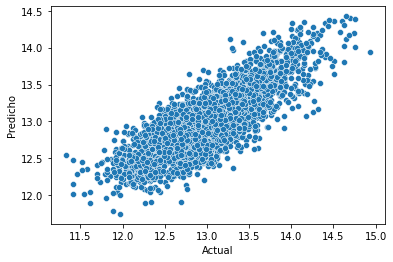

In [73]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [74]:
metricas('Polinomial', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,Polinomial,0.21392,1.651192,0.275467,0.075882,0.673504


## Regresión Gaussiana 

In [76]:
params = {
    'alpha' : [1e-10,1e-5,1e-3]
}
gpr = GaussianProcessRegressor()
modelo_pol = GridSearchCV(gpr, params,scoring ='neg_mean_squared_error' , cv = 5)
modelo_pol.fit(X,y)

GridSearchCV(cv=5, estimator=GaussianProcessRegressor(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001]},
             scoring='neg_mean_squared_error')

In [77]:
modelo_pol.best_params

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [78]:
modelo_gpr = GaussianProcessRegressor(random_state=0).fit(X_train, y_train)
y_ajustado = modelo_gpr.predict(X_test)

<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

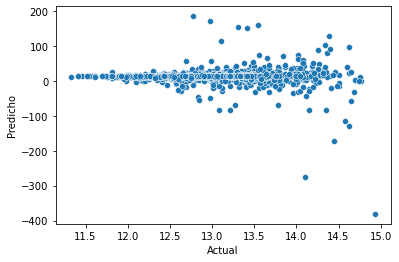

In [79]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [80]:
metricas('Gaussiana', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,Gaussiana,2.669347,19.79577,12.252481,150.123289,-644.932298


## Regresión RANSAC (Robusta)

In [81]:
params = {
    'base_estimator':[LinearRegression()], 
    'min_samples' : [2,3,4],
    'residual_threshold': [3,5,7], 
    'max_trials': [10, 30,50],
    'random_state': [0]
}
ransac = RANSACRegressor()
modelo_pol = GridSearchCV(ransac, params,scoring ='neg_mean_squared_error' , cv = 5)
modelo_pol.fit(X,y)

GridSearchCV(cv=5, estimator=RANSACRegressor(),
             param_grid={'base_estimator': [LinearRegression()],
                         'max_trials': [10, 30, 50], 'min_samples': [2, 3, 4],
                         'random_state': [0], 'residual_threshold': [3, 5, 7]},
             scoring='neg_mean_squared_error')

In [82]:
modelo_pol.best_params_

{'base_estimator': LinearRegression(),
 'max_trials': 10,
 'min_samples': 3,
 'random_state': 0,
 'residual_threshold': 7}

In [83]:
modelo_ransac = RANSACRegressor(base_estimator = LinearRegression(),
max_trials= 10,
min_samples =2,
random_state= 0,
residual_threshold=  3).fit(X_train, y_train)
y_ajustado = modelo_ransac.predict(X_test)

<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

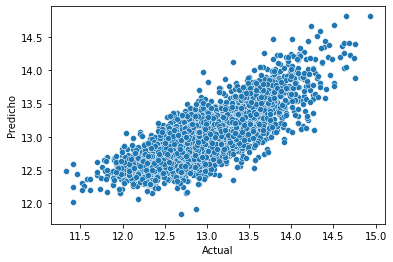

In [84]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [85]:
metricas('RANSAC', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,RANSAC,0.239726,1.85134,0.300735,0.090441,0.61086


# Nuevos modelos Agregados

# 1.SGDRegressor

In [48]:
params = {'alpha' : [0.0000000001]}
SGDRr = SGDRegressor()
SGDRr = GridSearchCV(SGDRr, params,scoring ='neg_mean_squared_error' , cv = 5)
SGDRr.fit(X,y)

GridSearchCV(cv=5, estimator=SGDRegressor(), param_grid={'alpha': [1e-10]},
             scoring='neg_mean_squared_error')

In [49]:
modelo_SGDRr = SGDRegressor().fit(X_train, y_train)
y_ajustado = modelo_SGDRr.predict(X_test)

<AxesSubplot:xlabel='Actual', ylabel='Predicho'>

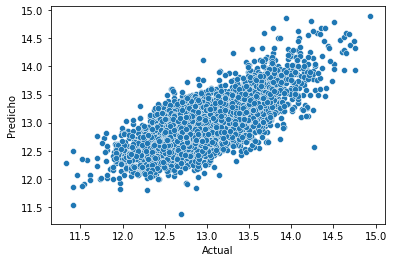

In [50]:
df = pd.DataFrame({'Actual': np.log1p(y_test), 'Predicho': y_ajustado})
sns.scatterplot(x = 'Actual', y = 'Predicho', data = df)

In [51]:
metricas('SGDRr', np.log1p( y_test ),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE,R2
0,SGDRr,0.261652,2.01737,0.331251,0.109727,0.527879


# 2.

# 3.

# Modelo final 

In [106]:
xgboost_final = xgb.XGBRegressor(eta = 0.1, max_depth = 5, n_estimators = 120).fit(X_train, y_train)
y_ajustado = np.expm1(xgboost_final.predict(X_test))

In [107]:
joblib.dump(xgboost_final, '../Modelos/final_model.sav')

['../Modelos/xbg_final.sav']